Importa o pandas e lê a base

In [2]:
import pandas as pd
df = pd.read_csv('../src/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Seleciona as colunas que vamos usar, no caso Annual Income (k$)	e Spending Score (1-100)

In [3]:
x = df.iloc[:,3:].values
x.shape

(200, 2)

Preparação e plot do método Elbow, usado para determinar quantos clusters precisamos criar.
Ele checa quantos "centróides" há em cada cluster a fim de identificar o melhor valor.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)

In [5]:
from sklearn.cluster import KMeans
ssd = []

In [6]:
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=12)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)

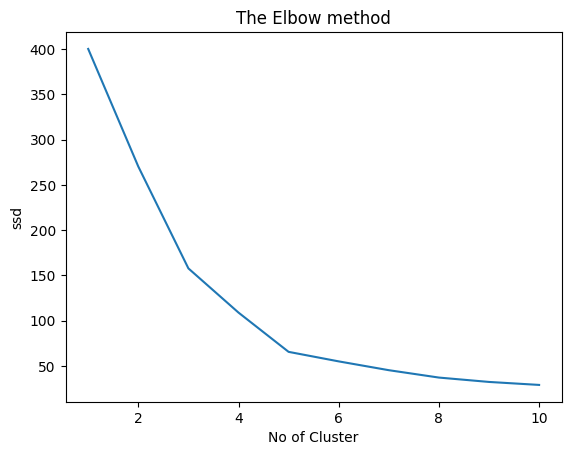

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),ssd)
plt.title('The Elbow method')
plt.xlabel('No of Cluster')
plt.ylabel('ssd')
plt.show()

Como explicado pelo método, é preciso escolher valores que estejam no "cotovelo" do gráfico, nesse caso começamos a testar o modelo pelo 3

In [8]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=12)

kmeans.fit(x)

y_cluster = kmeans.predict(x)

In [9]:
y_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

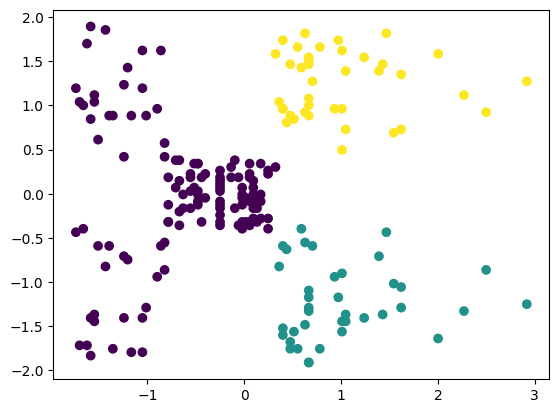

In [10]:
x1 = x[:,0]
x2 = x[:,1]

plt.scatter(x1, x2, c = y_cluster)

Agora testamos o modelo pelo 5

In [11]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=12)

kmeans.fit(x)

y_cluster = kmeans.predict(x)

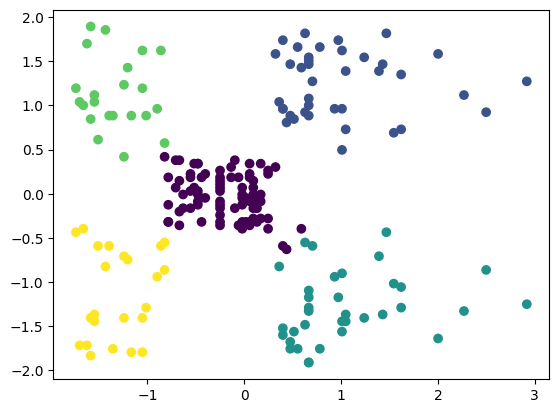

In [12]:
x1 = x[:,0]
x2 = x[:,1]

plt.scatter(x1, x2, c = y_cluster)

Para descobrir o valor ideal de k, usamos a métrica Silhouette Scores

In [13]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=12)
    kmeans.fit(x)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

optimal_k = np.argmax(silhouette_scores) + 2

In [14]:
optimal_k

5